In [20]:
from scipy.io.arff import loadarff
import pandas as pd 

# Martijn's path: /content/drive/Shareddrives/Martijn/xAI course/dataset_31_credit-g.arff
raw_data = loadarff("dataset_31_credit-g.arff")
data = pd.read_csv(r'C:\Users\elif.yozkan\Desktop\XAI-Project\model\training_data.csv')
#df = pd.DataFrame(raw_data)

for col, dtype in df.dtypes.items():
    if dtype == object:  # Only process byte object columns.
        df[col] = df[col].apply(lambda x: x.decode("utf-8"))

X = df.drop('class', axis=1)
y = df['class']

def convert_to_dummies(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, dummy_columns], axis=1)
            df = df.drop(column, axis=1)
    return df

X_prime = convert_to_dummies(X)
X_prime

KeyError: "['class'] not found in axis"

In [21]:
X_prime = pd.read_csv(r'C:\Users\elif.yozkan\Desktop\XAI-Project\model\training_data.csv')

### SHAP Contribution Plot

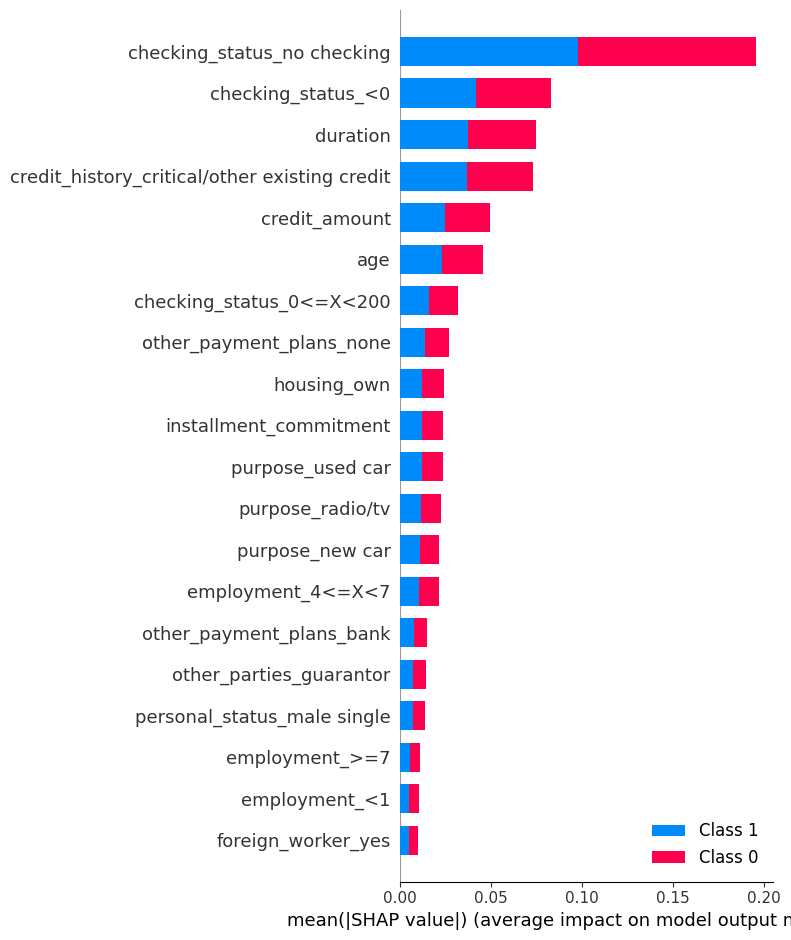

In [22]:
import joblib
import shap
import matplotlib.pyplot as plt

clf = joblib.load('model\classifier.pkl')
explainer = shap.TreeExplainer(clf)
# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_prime)

plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_prime, plot_type="bar")
plt.show()

### SHAP explanations for Good credit score 

* A positive checking account, a and a longer duration of existing credit all contribute to a higher predicted credit score. 
* We also see that the higher value of age tends to negatively affect a good credit score 
* The existence of other ongoing credits also lower the chances of getting a good credit score, similarly if all prior credits are paid, then the likelihood of a good credit score increases. 
* A higher credit amount also positively contribute to a good credit score. 

In [56]:
import numpy as np 

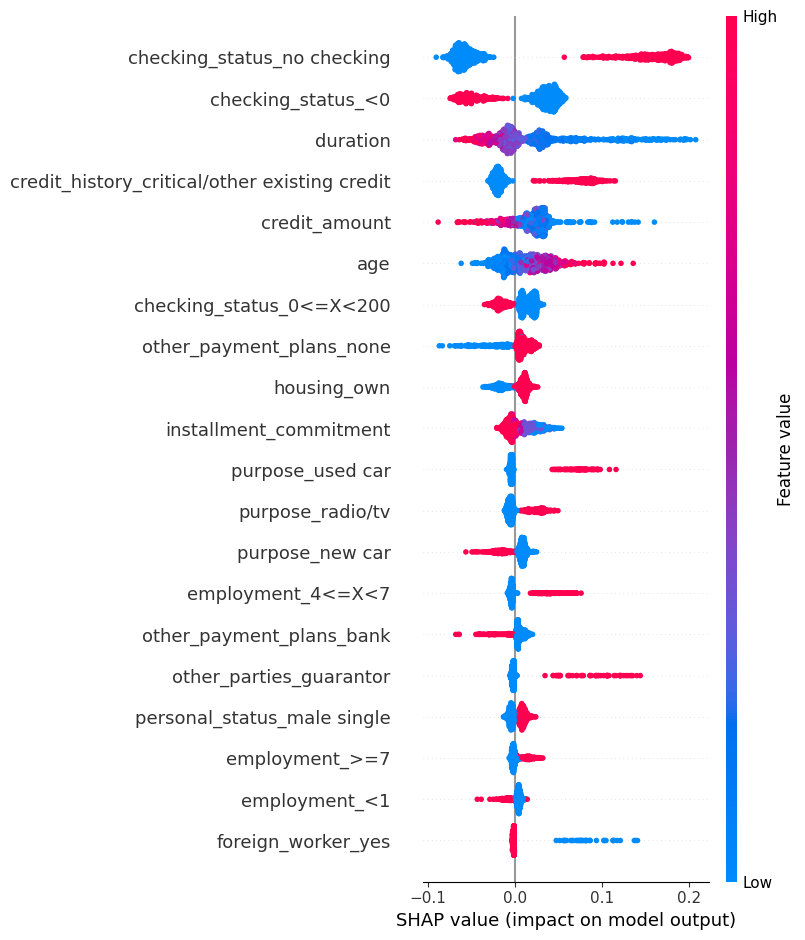

In [23]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[0], X_prime, plot_type="dot")
plt.show()

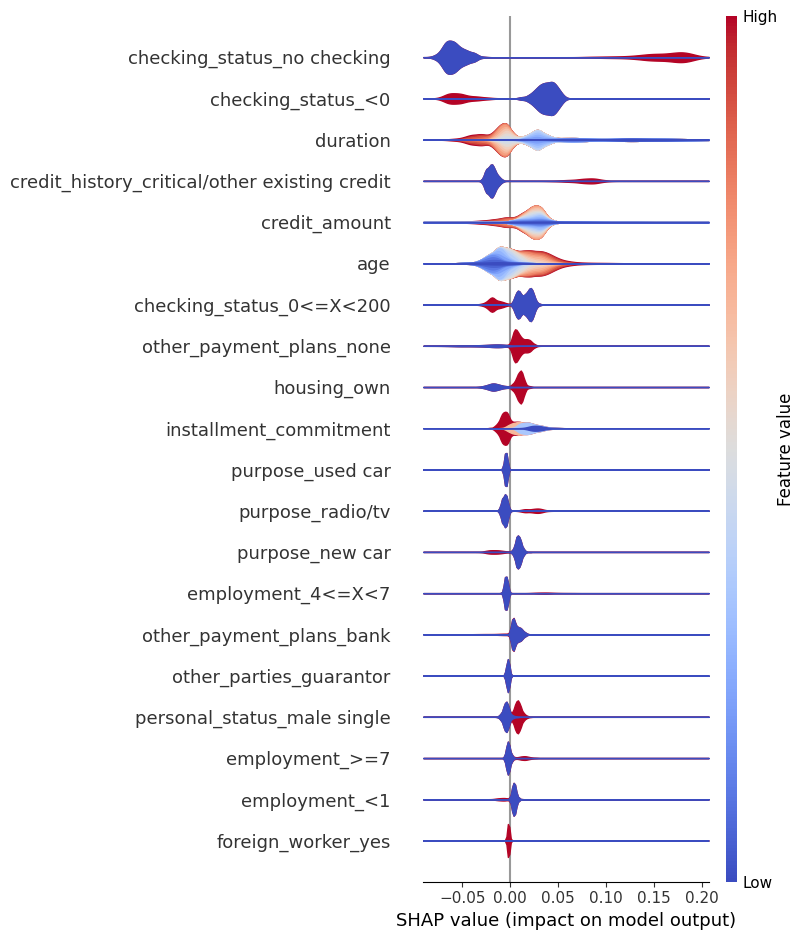

In [24]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[0], X_prime, plot_type="layered_violin")
plt.show()

In [58]:
probabilities = clf.predict_proba(X_prime.drop('credit_risk',axis=1))
## 70, 930, 592, 663, 892, 207, 729, 458, 745, 51
# Step 2: Calculate absolute differences from decision boundary (0.5)
probabilities[70]

array([0.50003828, 0.49996172])

In [31]:
type(clf.predict(X_prime.drop('credit_risk',axis=1))[0])

numpy.bool_

In [29]:
correctly_classified_indices_0 = [index for index, pred in enumerate(clf.predict(X_prime.drop('credit_risk',axis=1))) if( (pred == y[index])& (pred == True))]
correctly_classified_indices_1 = [index for index, pred in enumerate(clf.predict(X_prime.drop('credit_risk',axis=1))) if( (pred == y[index])& (pred == False))]

print((correctly_classified_indices_1))
# Choose 1-2 misclassified instances
misclassified_indices_0 = [index for index, pred in enumerate(clf.predict(X_prime.drop('credit_risk',axis=1))) if( (pred != y[index]) & (pred == True))]
misclassified_indices_1 = [index for index, pred in enumerate(clf.predict(X_prime.drop('credit_risk',axis=1))) if( (pred != y[index]) & (pred == False))]

#print(misclassified_indices_0)


[]


## Shap Force Plots For Misclassified instances as "good" 

In [96]:
X_prime.loc[X_prime['personal_status_male single']==True]

duration  credit_amount  installment_commitment   age  \
0         6.0         1169.0                     4.0  67.0   
2        12.0         2096.0                     2.0  49.0   
3        42.0         7882.0                     2.0  45.0   
4        24.0         4870.0                     3.0  53.0   
5        36.0         9055.0                     2.0  35.0   
..        ...            ...                     ...   ...   
993      36.0         3959.0                     4.0  30.0   
994      12.0         2390.0                     4.0  50.0   
997      12.0          804.0                     4.0  38.0   
998      45.0         1845.0                     4.0  23.0   
999      45.0         4576.0                     3.0  27.0   

     checking_status_0<=X<200  checking_status_<0  checking_status_>=200  \
0                       False                True                  False   
2                       False               False                  False   
3                       False                True                  False   
4                       False                True                  False   
5                       False               False                  False   
..                        ...                 ...                    ...   
993                     False                True                  False   
994                     False               False                  False   
997                     False               False                  False   
998                     False                True                  False   
999                      True               False                  False   

     checking_status_no checking  credit_history_all paid  \
0                          False                    False   
2                           True                    False   
3                          False                    False   
4                          False                    False   
5                           True                    False   
..                           ...                      ...   
993                        False                    False   
994                         True                    False   
997                         True                    False   
998                        False                    False   
999                        False                    False   

     credit_history_critical/other existing credit  ...  \
0                                             True  ...   
2                                             True  ...   
3                                            False  ...   
4                                            False  ...   
5                                            False  ...   
..                                             ...  ...   
993                                          False  ...   
994                                          False  ...   
997                                          False  ...   
998                                          False  ...   
999                                           True  ...   

     other_parties_guarantor  other_parties_none  other_payment_plans_bank  \
0                      False                True                     False   
2                      False                True                     False   
3                       True               False                     False   
4                      False                True                     False   
5                      False                True                     False   
..                       ...                 ...                       ...   
993                    False                True                     False   
994                    False                True                     False   
997                    False                True                     False   
998                    False                True                     False   
999                    False                Tru

In [34]:
print(type(explainer.expected_value))
print(explainer.expected_value.shape)
explainer.expected_value[0]

def show_force_plot(index): 
    explainer = shap.TreeExplainer(clf)
# Calculate SHAP values for a set of samples (e.g., X_test)
    shap_values = explainer.shap_values(X_prime)
# Visualize SHAP values for the selected instances

    force_plot = shap.force_plot(
        explainer.expected_value[0], 
        shap_values[0][index,:],
        feature_names= X_prime.columns.tolist()
    )
    shap.initjs()
    display(force_plot)


show_force_plot(1)
show_force_plot(15)

<class 'numpy.ndarray'>
(2,)


## Shap Force Plots For correctly classfied instances as "good" 

In [101]:
show_force_plot(5)
show_force_plot(150)

## Shap Force Plots For Misclassified instances as "bad" 

In [93]:
### 70, 930, 592, 663, 892, 207, 729, 458, 745, 51
show_force_plot(592)
show_force_plot(892)

## Shap Force Plots For Correctly Classified instances as "bad" 

In [55]:
show_force_plot(69)
show_force_plot(212)

In [79]:
import joblib
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
import numpy as np

clf = joblib.load('model\classifier.pkl')

# Assuming X_prime contains the samples for which you want to explain predictions
# You might need to have your X_prime as a pandas DataFrame or numpy array
# Convert it accordingly if it's not in one of these formats
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_prime.drop('credit_risk',axis=1)),feature_names=X_prime.drop('credit_risk',axis=1).columns, mode='classification')

# Choose a sample for which you want to explain the prediction
# Let's say the first sample
sample_index = 0
exp = explainer.explain_instance(X_prime.drop('credit_risk',axis=1).iloc[592], clf.predict_proba, num_features=len(X_prime.drop('credit_risk',axis=1).iloc[663]))

exp.show_in_notebook(show_table=True)
plt.show()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [84]:
X_prime.columns

Index(['duration', 'credit_amount', 'installment_commitment', 'age',
       'checking_status_0<=X<200', 'checking_status_<0',
       'checking_status_>=200', 'checking_status_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'employment_1<=X<4', 'employment_4<=X<7',
       'employment_<1', 'employment_>=7', 'employment_unemployed',
       'personal_status_female div/dep/mar', 'personal_status_male div/sep',
       'personal_status_male mar/wid', 'personal_status_male single',
       'other_parties_co applicant', 'other_parties_guarantor',
       'other_parties_none', 'oth

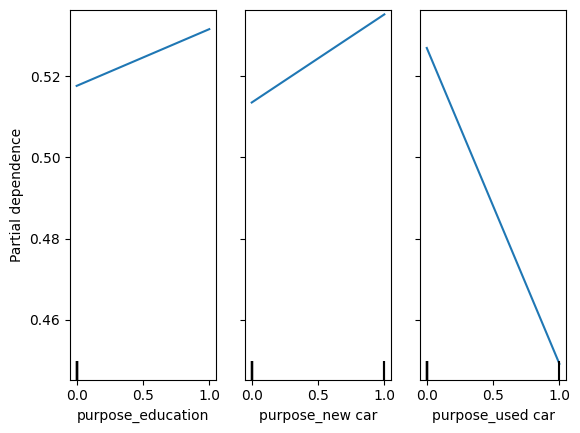

In [91]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Select features for which you want to generate PDPs
features = [ 'purpose_education', 'purpose_new car',
       'purpose_used car']  # Example: First 3 features

PartialDependenceDisplay.from_estimator(clf, X_prime.drop('credit_risk',axis=1), features)
